# **1 - Perkenalanan**

Nama. : Josua Yerico

Batch : FTDS-001-Hck

Dataset : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Objective : Pembuatan model untuk prediksi customer churn suatu ecommerce dari data telco sebuah perusahan.

# **2 - Import Libaries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import plot_confusion_matrix
import pickle

#for data imbalance
from imblearn.over_sampling import SMOTE

# Split between Train-Set and Test-Set
from sklearn.model_selection import train_test_split

#Handling outlier
!pip install feature-engine
from feature_engine.outliers import Winsorizer

#for correlation test with heatmap method
!pip install phik
import phik

#for feature scalling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#for feature encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#for Classification Problem
import tensorflow as tf

# Evaluate clasification Models
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score, roc_curve

#for pipeline preprocessing
from sklearn.compose import ColumnTransformer

np.random.seed(42)
tf.random.set_seed(42)

# **3 - Data Loading**

Pada kasus ini data diambil dari https://www.kaggle.com/datasets/blastchar/telco-customer-churn 

Berikut merupakan dataset customer dari suatu ecommerce:

In [2]:
# Load Dataset to notebook
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#Duplicate dataframe
data_copy = data.copy()

Berikut merupakan data teratas dari dataset tersebut:

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Berikut merupakan data terbawah dari dataset tersebut:

In [5]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Check Mising Value pada target dan feature

Berikut merupakan informasi dari dataset tersebut:

In [6]:
#Check 1: check data type and mising value in dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#unique value
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Berdasarkan data tersebut tidak terdapat mising value pada dataset tersebut, akan tetapi type data untuk feature total charge tersebut merupakan type data object sedangkan isi dari feature tersebut adalah data numerical . oleh karena itu, untuk tahapan selanjutnya dilakukan perubahan type data total charge dari object menjadi numeric.

In [8]:
data.loc[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


## Changes Type Data Object to Numeric on Feature TotalCharges

In [9]:
data['TotalCharges'] = data['TotalCharges'].replace({' ':'NAN'})

In [10]:
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terdapat mising value pada feature TotalCharge. dikarenakan jumlah mising valuenya kurang dari 1%. maka pada kasus ini semua mising valuenya di handling dengan cara membuang data yang terdapat mising value.

In [12]:
#Handling Mising Value 
data_final = data.dropna()
data_final

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:
#Check 2: make sure mising value with max, min, Q1, Q2, and Q3 in dataset 
data_final.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Berdasarkan data tersebut tidak terdapat mising value pada dataset tersebut. 

## Check Duplicates data pada feature dan target

In [14]:
#Check 3: Data Duplicate #1
data_final.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7032, dtype: bool

Tidak ada duplikat data pada dataset tersebut

## Encoding Target

Dikarenakan model tidak dapat membaca categorical, oleh karena itu pada feature diperlukan untuk melakukan encoding dengan cara menganti kata 'NO' menjadi 0 dan kata 'Yes' menjadi 1.

In [15]:
data_final['Churn'] = data_final['Churn'].replace({'No': 0, 'Yes': 1})


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17140\985574823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['Churn'] = data_final['Churn'].replace({'No': 0, 'Yes': 1})


Berikut dataset terakhir setelah dibersihkan dari mising value:

In [16]:
data_final

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


# **4 - Exploratory Data Analysis (EDA)**

Pada kasus ini diperlukan untuk melakukan exploratory data analysis untuk mempermudah model dalam mempelajari pola data terbentuk. sehingga model dapat memprediksi klasifikasi dari data yang baru

## Get Data for Model Inference

pada kasus ini, dipisahkan 10 sample random yang akan digunakan sebagai data baru. sehingga dapat memutuskan apakah modelnya dapat digunakan dalam memprediksi customer churn atau tidak.

Berikut merupakan 10 sample data secara random dari dataset tersebut:

In [17]:
# Get Data for Model Inference
data_inf = data_final.sample(10, random_state=17)

# Remove Inference-Set from Dataset
data_train_test = data_final.drop(data_inf.index)

# Reset Index 
data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1918-ZBFQJ,Female,0,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,79.25,1111.65,1
1,9862-KJTYK,Male,0,No,Yes,19,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),25.35,566.10,0
2,5334-AFQJB,Male,1,No,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.10,1789.90,0
3,6253-WRFHY,Male,0,Yes,Yes,13,Yes,No,DSL,No,...,No,No,Yes,Yes,One year,Yes,Electronic check,64.75,877.35,0
4,5959-BELXA,Male,1,No,No,32,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),96.15,3019.25,1
5,1015-JPFYW,Male,0,No,Yes,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,136.75,0
6,2107-FBPTK,Female,1,No,No,30,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.10,3121.10,0
7,7551-DACSP,Male,0,Yes,Yes,6,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,55.30,324.25,1
8,1113-IUJYX,Female,0,Yes,No,14,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,No,Mailed check,105.95,1348.90,1
9,5245-VDBUR,Female,0,Yes,No,52,No,No phone service,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,35.45,1958.95,0


## Visualisasi Data

## Check Distribution Data

Text(0.5, 1.0, 'Distribution Data TotalCharges')

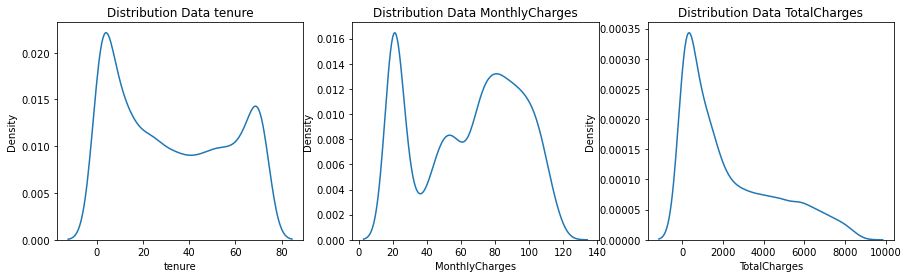

In [18]:
#check 4: check outlier and distribution data on feature with visualization
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.kdeplot(data=data, x='tenure')
plt.title('Distribution Data tenure')

plt.subplot(1,3,2)
sns.kdeplot(data=data, x='MonthlyCharges')
plt.title('Distribution Data MonthlyCharges')

plt.subplot(1,3,3)
sns.kdeplot(data=data, x='TotalCharges')
plt.title('Distribution Data TotalCharges')

Berdasarkan grafik overview tersebut didapat bahwa:
1. feature tenure memiliki dua puncak dan terdistribusi normal
2. feature monthly charge memiliki beberapa puncak dan terdistribusi normal
3. feature totalcharge memiliki satu puncak dan tidak terdistribusi normal atau skew. selain itu, feature tersebut terdapat beberapa outlier dan perlu di lakukan handling outlier.

## Relationship between Target and Features

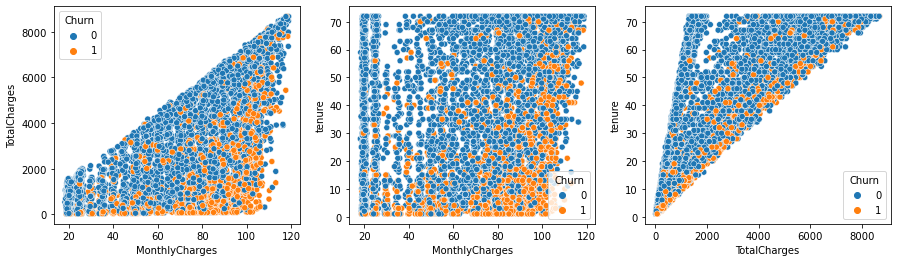

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(data=data_final, x='MonthlyCharges', y='TotalCharges', hue='Churn')

plt.subplot(1,3,2)
sns.scatterplot(data=data_final, x='MonthlyCharges', y='tenure', hue='Churn')

plt.subplot(1,3,3)
sns.scatterplot(data=data_final, x='TotalCharges', y='tenure', hue='Churn')

plt.show()

Berdasarkan grafik overiview tersebut, feature monthly charge, total charge, dan tenure tidak memperlihatkan suatu pola data terhadap target. hal ini mengartikan bahwa feature - feature tersebut tidak memiliki hubungan atau korelasi dengan feature target. total pembayaran dan tagihan bulanan customer tidak dapat memengaruhi seseorang dikelompokkan kedalam customer churn atau tidak 

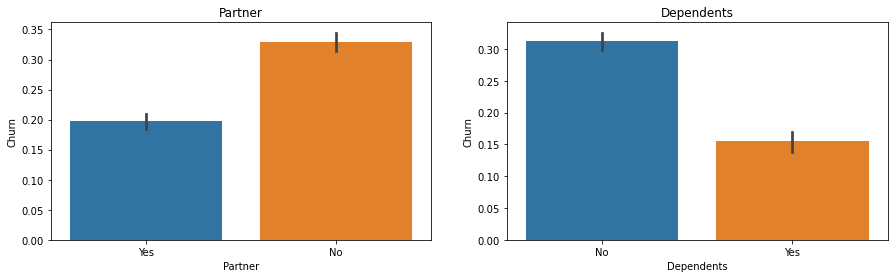

In [20]:
plt.figure(figsize=(15, 4))

#visualization Partner with target 
plt.subplot(1, 2, 1)
sns.barplot(data=data_final, x = 'Partner', y='Churn')
plt.title('Partner')

#visualization Dependents with target 
plt.subplot(1, 2, 2)
sns.barplot(data=data_final, x = 'Dependents',  y='Churn')
plt.title('Dependents')

plt.show()

Berdasarkan grafik tersebut diperlihatkan bahwa customer yang memiliki pasangan dan tanggungan cendrung dikelompokkan kedalam customer yang churn. hal tersebut dapat dipengaruhi bahwa harga dari langganan pada perusahan ini cendrung mahal dan tidak dapat dijadikan sebagai kebutuhan prioritas dari customer. pada kasus ini, pihak perusahan dapat melakukan promosi untuk menarik customer - customer tersebut menjadi berlangganan lagi. untuk memastikan hal tersebut, diperlukan uji korelasi mengunakan heatmap.

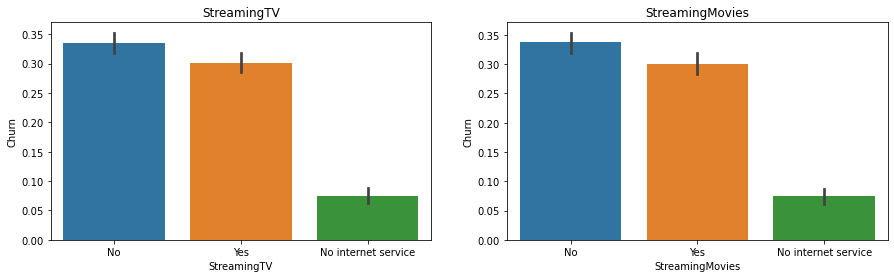

In [21]:
plt.figure(figsize=(15, 4))

#visualization StreamingTV with target 
plt.subplot(1, 2, 1)
sns.barplot(data=data_final, x = 'StreamingTV', y='Churn')
plt.title('StreamingTV')

#visualization StreamingMovies with target 
plt.subplot(1, 2, 2)
sns.barplot(data=data_final, x = 'StreamingMovies',  y='Churn')
plt.title('StreamingMovies')

plt.show()

Berdasarkan grafik tersebut tidak terlihat hubungan yang sangat kuat anatara deature stremingtv, streaming movie terhadap feature target. hal tersebut tidak terlihat bahwa customer churn atau tidak dikarenakan customer tersebut melakukan  streaming tv dan movie dengan lancar atau tidak. untuk memastikan tersebut diperlukan uji korelasi mengunakan heatmap.

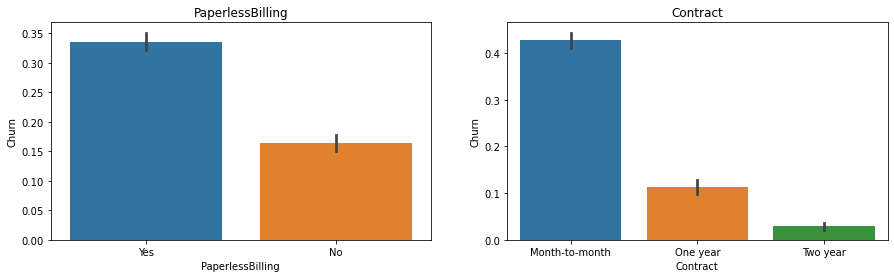

In [22]:
plt.figure(figsize=(15, 4))


#visualization PaperlessBilling with target 
plt.subplot(1, 2, 1)
sns.barplot(data=data_final, x = 'PaperlessBilling',  y='Churn')
plt.title('PaperlessBilling')

#visualization Contract with target 
plt.subplot(1, 2, 2)
sns.barplot(data=data_final, x = 'Contract',  y='Churn')
plt.title('Contract')


plt.show()

berdasarkan grafik tersebut, terdapat hubungan antara feature techsupport, paperbiling, dan contract dengan feature target. customer yang dikelompokkan sebagai customer churn merupakan customer yang berlangganan dalam kurun waktu satu sampai dua tahun. hal ini mengartikan bahwa mungkin customer tersebut merasakan pelayanan yang buruk terhadap pelayanan dari perusahan tersebut. hal tersebut dapat menjadi masukkan bagi perusahan untuk menarik customer - customer yang churn dengan meningkatkan pelayanan atau kualitas produk dari perusahan tersebut.

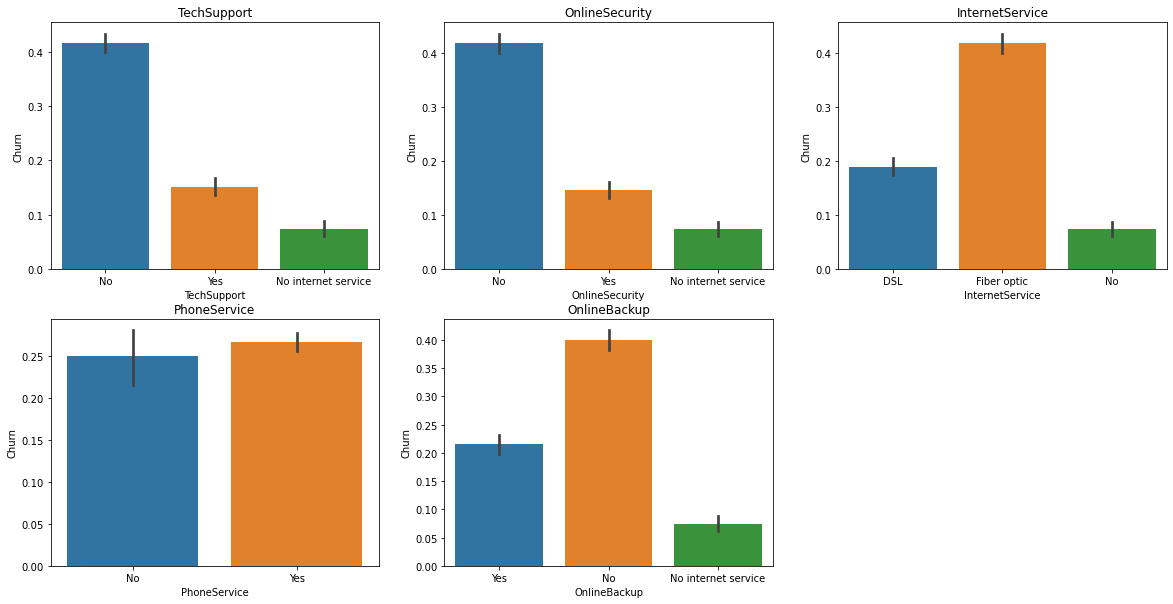

In [23]:
plt.figure(figsize=(20, 10))

#visualization TechSupport with target 
plt.subplot(2, 3, 1)
sns.barplot(data=data_final, x = 'TechSupport', y='Churn')
plt.title('TechSupport')

#visualization OnlineSecurity with target 
plt.subplot(2, 3, 2)
sns.barplot(data=data_final, x = 'OnlineSecurity',  y='Churn')
plt.title('OnlineSecurity')

#visualization InternetService with target 
plt.subplot(2, 3, 3)
sns.barplot(data=data_final, x = 'InternetService',  y='Churn')
plt.title('InternetService')

#visualization PhoneService with target 
plt.subplot(2, 3, 4)
sns.barplot(data=data_final, x = 'PhoneService',  y='Churn')
plt.title('PhoneService')

#visualization OnlineBackup with target 
plt.subplot(2, 3, 5)
sns.barplot(data=data_final, x = 'OnlineBackup',  y='Churn')
plt.title('OnlineBackup')

plt.show()

Berdasarkan grafik tersebut, customer yang tidak churn tidak merasakan kualitas internet yang buruk ketika customer tersebut mengunakan dalam browsing/streaming atau dan sebagainya. tetapi sebaliknya customer yang churn merasakan kualitas dan pelayanan yang buruk terhadap produk perusahan tersebut. akan tetapi hal tersebut tidak dapat memastikan bahwa feature - feature tersebut saling bergantungan dengan feature target.

## Splitting between X (Features) and y (Target) and Spliting data training, data validation, and data test

pada kasus ini dilakukan pemisahan feature dan target menjadi tiga bagian. hal ini berguna untuk mentraining dann mengevaluasi model sehingga mendapatkan nilai akurasi yang maksimal.

In [24]:
# Split between `X` (Features) and `y` (Target)
X = data_train_test.drop('Churn', axis=1) 
y = data_train_test['Churn']

# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=17, stratify=y_train)

print('Train Size : ', X_train.shape)
print('Validation Size : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (5055, 20)
Validation Size :  (1264, 20)
Test Size  :  (703, 20)


## Feature Selection

Feature selection pada kasus ini untuk mereduksi feature - feature yang tidak saling berhubungan dengan feature target supaya meminimalisir waktu dalam pembuatan model dan meningkatkan akurasi model tersebut dalam memprediksi model

In [25]:
#combine features and target for feature selection
X_train_copy = X_train.copy()
X_train_copy['Churn'] = y_train

## Correlation Test

interval columns not set, guessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


c:\Users\LENOVO\anaconda3\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable customerID is large: 5055. Are you sure this is not an interval variable? Analysis for pairs of variables including customerID can be slow.
  warnings.warn(


<AxesSubplot:title={'center':'Correlation Heatmap between feature and target/feature'}>

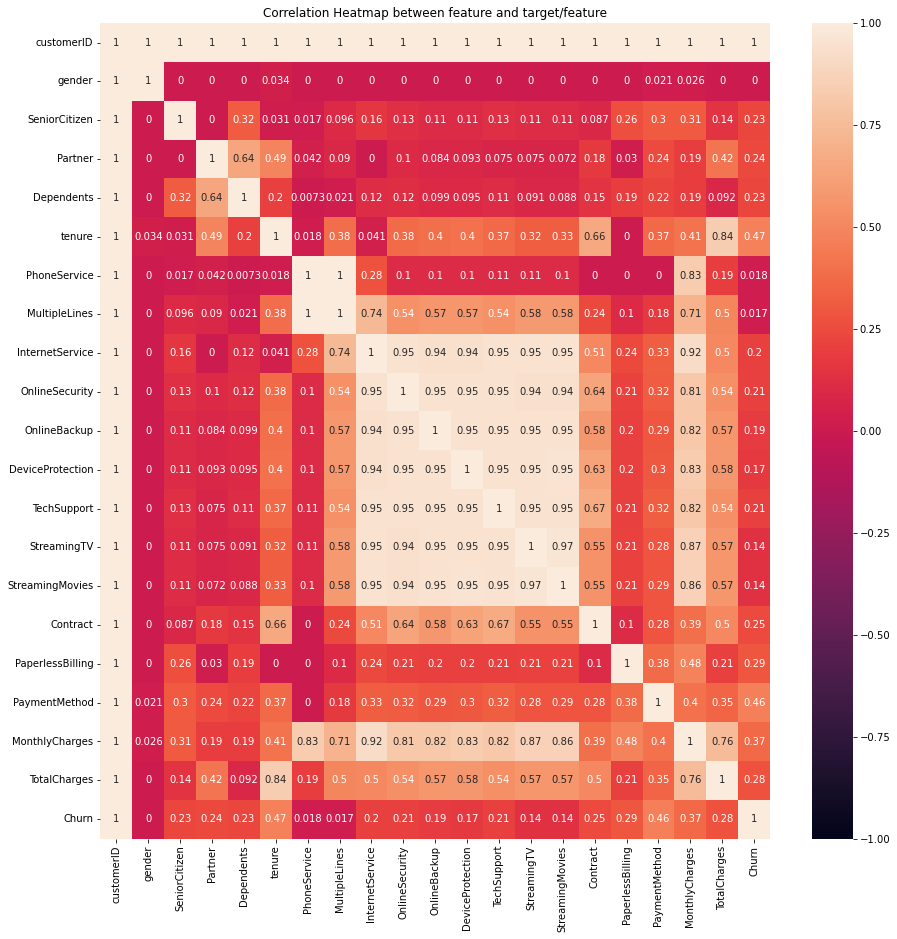

In [26]:
plt.figure(figsize=(15, 15))
plt.title('Correlation Heatmap between feature and target/feature')
sns.heatmap(X_train_copy.phik_matrix(), vmin=-1, vmax=1, annot=True)

Berdasarkan data tersebut terlihat bahwa feature tenure, PaymentMethod, MonthlyCharges, PaperlessBilling, TotalCharges, Contract, Partner, SeniorCitizen, Dependents, TechSupport, OnlineSecurity,  dan InternetService memiliki nilai korelasi yang cukup tinggi. hal ini mengartikan bahwa feature - feature tersebut saling bergantungan dengan feature target.

In [27]:
#dataframe after selection each feature
X_train_ok = X_train[['tenure', 'PaymentMethod', 'MonthlyCharges', 'PaperlessBilling', 'TotalCharges', 'Contract', 'Partner', 'SeniorCitizen', 'Dependents', 'TechSupport', 'OnlineSecurity', 'InternetService']]
X_val_ok = X_val[['tenure', 'PaymentMethod', 'MonthlyCharges', 'PaperlessBilling', 'TotalCharges', 'Contract', 'Partner', 'SeniorCitizen', 'Dependents', 'TechSupport', 'OnlineSecurity', 'InternetService']]
X_test_ok =  X_test[['tenure', 'PaymentMethod', 'MonthlyCharges', 'PaperlessBilling', 'TotalCharges', 'Contract', 'Partner', 'SeniorCitizen', 'Dependents', 'TechSupport', 'OnlineSecurity', 'InternetService']]

Berikut dataset setelah dilakukan feature seleksi:

In [28]:
X_train_ok.reset_index(drop=True)

,tenure,PaymentMethod,MonthlyCharges,PaperlessBilling,TotalCharges,Contract,Partner,SeniorCitizen,Dependents,TechSupport,OnlineSecurity,InternetService
0,52,Bank transfer (automatic),105.10,Yes,5376.40,One year,Yes,1,No,No,No,Fiber optic
1,37,Bank transfer (automatic),98.80,No,3475.55,Month-to-month,No,0,No,Yes,No,Fiber optic
2,1,Electronic check,73.55,Yes,73.55,Month-to-month,Yes,1,No,No,No,Fiber optic
3,32,Mailed check,20.50,No,696.80,Two year,No,0,Yes,No internet service,No internet service,No
4,14,Electronic check,82.65,Yes,1185.00,Month-to-month,Yes,0,No,No,No,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...
5050,32,Electronic check,84.05,No,2781.85,One year,No,0,No,No,No,Fiber optic
5051,67,Bank transfer (automatic),118.35,Yes,7804.15,One year,No,0,No,Yes,Yes,Fiber optic
5052,8,Mailed check,54.65,No,482.25,Month-to-month,Yes,0,Yes,No,Yes,DSL
5053,3,Mailed check,55.15,No,159.15,Month-to-month,No,0,No,No,No,DSL


## Handling Outlier

Pada kasus ini perlu dilakukan handling outlier karena terdapat salah satu feature yang memiliki distribusi data tidak normal. hal tersebut untuk menghindari nilai - nilai yang terlalu besar atau kecil dengan jumlah frekuensi yang terlalu kecil. hal tersebut bertujuan untuk meningkat keakurasian pada model dalam memprediksi customer segmentasion churn atau tidak

In [29]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(X_train_ok, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_ok[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train_ok[variable])
    plt.title('Boxplot')

    plt.show()

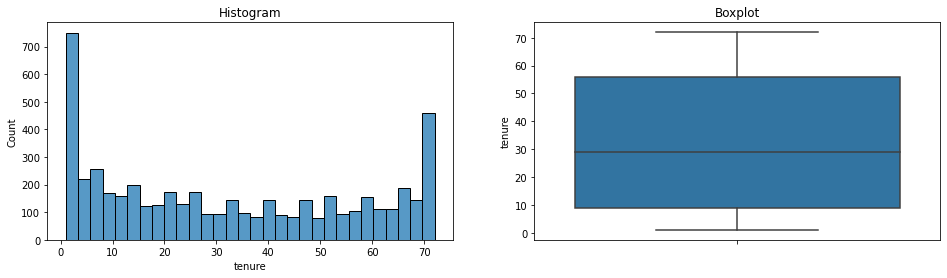


Skewness Value :  0.24125720946332405


In [30]:
# let's inspect now the variable tenure from X_train
# refers to the tenure of the passengers on board

diagnostic_plots(X_train_ok, 'tenure')
print('\nSkewness Value : ', X_train_ok['tenure'].skew())

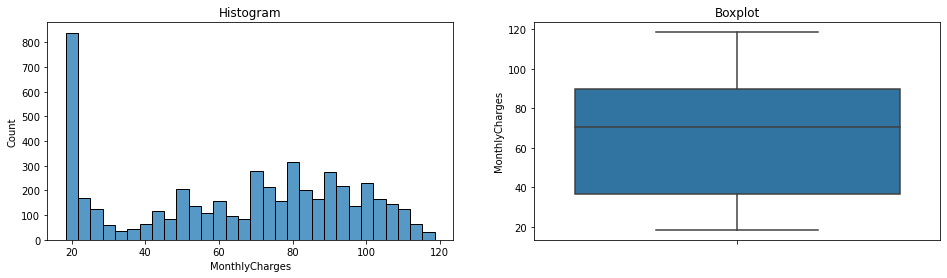


Skewness Value :  -0.23504019750521227


In [31]:
# let's inspect now the variable MonthlyCharges from X_train
# refers to the MonthlyCharges of the passengers on board

diagnostic_plots(X_train_ok, 'MonthlyCharges')
print('\nSkewness Value : ', X_train_ok['MonthlyCharges'].skew())

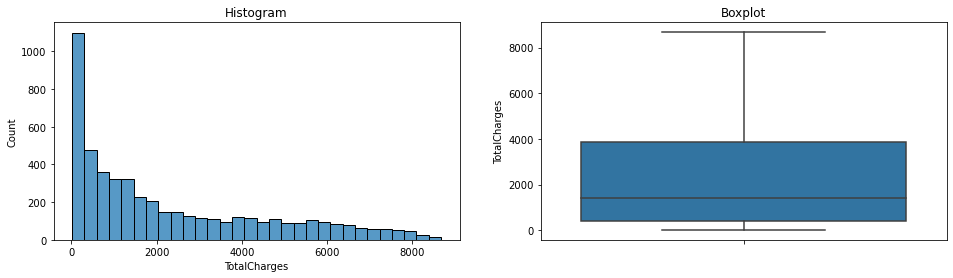


Skewness Value :  0.946890520411997


In [32]:
# let's inspect now the variable TotalCharges from X_train
# refers to the TotalCharges of the passengers on board

diagnostic_plots(X_train_ok, 'TotalCharges')
print('\nSkewness Value : ', X_train_ok['TotalCharges'].skew())

berdasarkan grafik overview tersebut, feature total charge memiliki distribusi data yang tidak normal dan perlu dilakukan handling outlier pada feature tersebut. 

## IQR, Upper Limit, and Lower Limit

In [33]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# limit passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = X_train_ok[variable].quantile(0.75) - X_train_ok[variable].quantile(0.25)

    lower_boundary = X_train_ok[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = X_train_ok[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [34]:
# Limits for 'TotalCharges'
Total_upper_limit, Total_lower_limit = find_skewed_boundaries(X_train_ok, 'TotalCharges', 1.5)
Total_upper_limit, Total_lower_limit


print('Total_upper_limit : ', Total_upper_limit)
print('Total_lower_limit : ', Total_lower_limit, '\n')

Total_upper_limit :  9020.587500000001
Total_lower_limit :  -4773.512500000001 



## Outlier and Cleaning from outlier

In [35]:
# Flag the outliers in category `TotalCharges`
outliers_limit = np.where(X_train_ok['TotalCharges'] > Total_upper_limit, True,
                       np.where(X_train_ok['TotalCharges'] < Total_lower_limit, True, False))


print('bool outlier Total:',outliers_limit[:10])

bool outlier Total: [False False False False False False False False False False]


Berdasarkan hasil flag tersebt didapat bahwa tidak ada nilai - nilai yang berada diluar batas bawah dan batas atas dari feature total charge.

In [36]:
#Handling outlier with capping method
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['TotalCharges'])

windsoriser.fit_transform(X_train_ok)

X_train_fix = windsoriser.transform(X_train_ok)
X_val_fix = windsoriser.transform(X_val_ok)
X_test_fix = windsoriser.transform(X_test_ok)

## Cleaning data outlier with capping censoring method

In [37]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'TotalCharges': -4773.512500000001}
Right Tail Caps :  {'TotalCharges': 9020.587500000001}


In [38]:
print('X_train Dataframe - Before Capping')
print(X_train_ok.describe())
print('')
print('X_train Dataframe - After Capping')
print(X_train_fix.describe())

X_train Dataframe - Before Capping
            tenure  MonthlyCharges  TotalCharges  SeniorCitizen
count  5055.000000     5055.000000   5055.000000    5055.000000
mean     32.405737       65.043699   2292.632285       0.158259
std      24.520550       30.008475   2267.379096       0.365020
min       1.000000       18.400000     18.800000       0.000000
25%       9.000000       36.575000    399.275000       0.000000
50%      29.000000       70.550000   1414.800000       0.000000
75%      56.000000       89.900000   3847.800000       0.000000
max      72.000000      118.600000   8670.100000       1.000000

X_train Dataframe - After Capping
            tenure  MonthlyCharges  TotalCharges  SeniorCitizen
count  5055.000000     5055.000000   5055.000000    5055.000000
mean     32.405737       65.043699   2292.632285       0.158259
std      24.520550       30.008475   2267.379096       0.365020
min       1.000000       18.400000     18.800000       0.000000
25%       9.000000       36.575000

distance - Before Capping


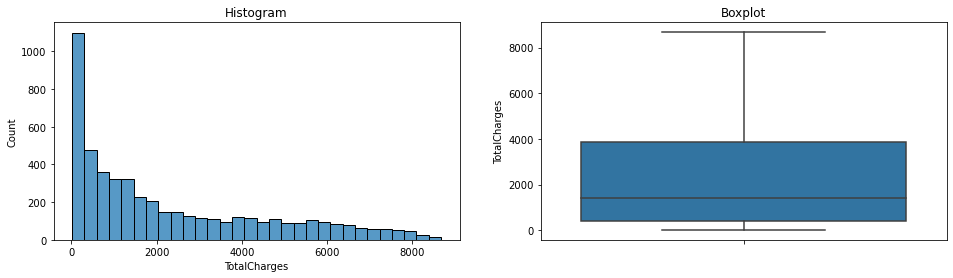


Skewness Value :  0.946890520411997
distance - After Capping


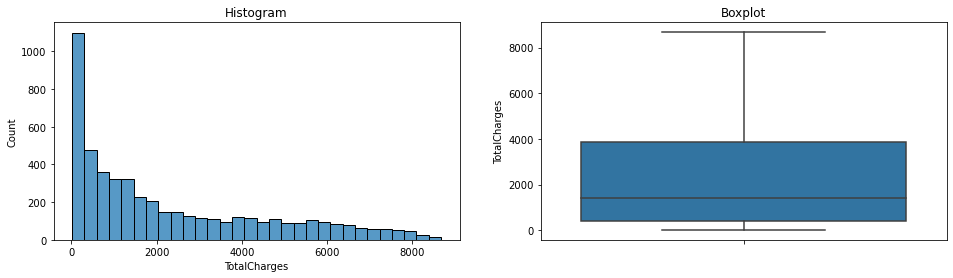


Skewness Value :  0.946890520411997


In [39]:
# Let's find outliers in `limit_balance`

print('distance - Before Capping')
diagnostic_plots(X_train_ok, 'TotalCharges')
print('\nSkewness Value : ', X_train_ok['TotalCharges'].skew())
print('distance - After Capping')
diagnostic_plots(X_train_fix, 'TotalCharges')
print('\nSkewness Value : ', X_train_fix['TotalCharges'].skew())

## Split between Numerical Columns and Categorical Columns 

In [40]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_fix.select_dtypes(include=np.number).columns.tolist() 
cat_columns = X_train_fix.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
Categorical Columns :  ['PaymentMethod', 'PaperlessBilling', 'Contract', 'Partner', 'Dependents', 'TechSupport', 'OnlineSecurity', 'InternetService']


In [41]:
# Split Train-Set and Test-Set based on Column Types 

X_train_num = X_train_fix[num_columns]
X_train_cat= X_train_fix[cat_columns]
X_val_num = X_val_fix[num_columns]
X_val_cat= X_val_fix[cat_columns]
X_test_num =X_test_fix[num_columns]
X_test_cat = X_test_fix[cat_columns]

## Feature Scalling

Feature scaling digunakan untuk mereduksi range skala pada feature - feature numerical sehingga dapat meningkatkan keakurasian dalam model untuk memprediksi customer churn atau tidak. pada kasus ini, dilakukan split data antara feature senior citizen dengan feature numerical yang lain. hal tersebut dikarenakan isi data pada kolom senior merupakan data boolen dan telah di encoding pada dataset awal.

In [42]:
no_train = X_train_num.drop('SeniorCitizen', axis=1)
senior_train = X_train_num['SeniorCitizen']
senior_train_final = pd.DataFrame(senior_train).reset_index(drop=True)

no_val = X_val_num.drop('SeniorCitizen', axis=1)
senior_val = X_val_num['SeniorCitizen']
senior_val_final = pd.DataFrame(senior_val).reset_index(drop=True)

no_test = X_test_num.drop('SeniorCitizen', axis=1)
senior_test = X_test_num['SeniorCitizen']
senior_test_final = pd.DataFrame(senior_test).reset_index(drop=True)

In [43]:
# Feature Scaling using StandardScaller

scaler = StandardScaler()
scaler.fit(no_train)

X_tf_num_scaled = scaler.transform(no_train)
X_tf_scaled_ok = pd.DataFrame(X_tf_num_scaled, columns=['tenure', 'MonthlyCharges', 'TotalCharges']).reset_index(drop=True)
X_val_num_scaled = scaler.transform(no_val)
X_val_scaled_ok = pd.DataFrame(X_val_num_scaled, columns=['tenure', 'MonthlyCharges', 'TotalCharges']).reset_index(drop=True)
X_test_num_scaled = scaler.transform(no_test)
X_test_scaled_ok = pd.DataFrame(X_test_num_scaled, columns=['tenure', 'MonthlyCharges', 'TotalCharges']).reset_index(drop=True)

In [44]:
encoder1 = OrdinalEncoder()

encoder1.fit_transform(senior_train_final)

senior_train_encoded = encoder1.transform(senior_train_final)
senior_val_encoded = encoder1.transform(senior_val_final)
senior_test_encoded = encoder1.transform(senior_test_final)

senior_train_final = pd.DataFrame(senior_train_encoded, columns=['SeniorCitizen']).reset_index(drop=True)
senior_val_final = pd.DataFrame(senior_val_encoded,columns=['SeniorCitizen']).reset_index(drop=True)
senior_test_final = pd.DataFrame(senior_test_encoded,columns=['SeniorCitizen']).reset_index(drop=True)

In [45]:
X_tf_num_scaled_ok = pd.concat([X_tf_scaled_ok, senior_train_final], axis=1).reset_index(drop=True)
X_val_num_scaled_ok = pd.concat([X_val_scaled_ok, senior_val_final], axis=1).reset_index(drop=True)
X_test_num_scaled_ok = pd.concat([X_test_scaled_ok, senior_test_final], axis=1).reset_index(drop=True)

## Feature Encoding

Feature encoding digunakan untuk mengubah type data feature categorical menjadi type data numerical supaya model dapat mempelajari pola data dari feature categorical.

In [46]:
encoder = OneHotEncoder()

encoder.fit_transform(X_train_cat)

X_train_encoded = encoder.transform(X_train_cat).toarray()
X_val_encoded = encoder.transform(X_val_cat).toarray()
X_test_encoded = encoder.transform(X_test_cat).toarray()

X_train_cat_ok = pd.DataFrame(X_train_encoded).reset_index(drop=True)
X_val_cat_ok = pd.DataFrame(X_val_encoded).reset_index(drop=True)
X_test_cat_ok = pd.DataFrame(X_test_encoded).reset_index(drop=True)

## Concate between Numerical Columns and Categorical Columns

In [47]:
# Concat columns
X_train_final = pd.concat([X_tf_num_scaled_ok, X_train_cat_ok], axis=1)
X_val_final = pd.concat([X_val_num_scaled_ok, X_val_cat_ok], axis=1)
X_test_final = pd.concat([X_test_num_scaled_ok, X_test_cat_ok], axis=1)

## Data Imbalance

Pada kasus ini perlu dilakukan data imbalance. hal ini bertujuan untuk menyamakan jumlah data churn dan tidak churn pada dataset dengan cara memasukkan data palsu secara random (metode over sampling)

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

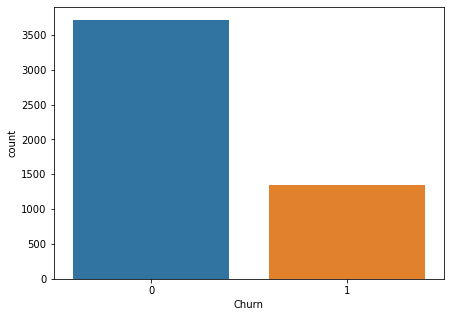

In [48]:
plt.figure(figsize=(7, 5))
sns.countplot(y_train)

In [49]:
#handling data imbalance

X_train_finalfix, y_train_final = SMOTE(sampling_strategy='minority', random_state=42).fit_resample(X_train_final, y_train)
y_train_final.value_counts()

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0    3713
1    3713
Name: Churn, dtype: int64

# **6 - Pipeline Preprocessing**

In [50]:
#make a variabel 
feature_num = list(no_train.columns.values)
feature_nonum = ['SeniorCitizen']
feature_cat = list(X_train_cat.columns.values)

#make a pipeline for data preprocessing 
preprocess = ColumnTransformer([
    ('num',scaler,feature_num),
    ('no', encoder1,feature_nonum),
    ('cat',encoder,feature_cat)
])

#training pipeline data preprocessing
preprocess.fit(X_train, y_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('no', OrdinalEncoder(), ['SeniorCitizen']),
                                ('cat', OneHotEncoder(),
                                 ['PaymentMethod', 'PaperlessBilling',
                                  'Contract', 'Partner', 'Dependents',
                                  'TechSupport', 'OnlineSecurity',
                                  'InternetService'])])

# **6 - Pipeline Tensorflow**

In [51]:

train_dat = tf.data.Dataset.from_tensor_slices((X_train_finalfix, y_train_final)).shuffle(buffer_size=3700).batch(64)
val_dat = tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).batch(32)
test_dat = tf.data.Dataset.from_tensor_slices((X_test_final, y_test)).batch(32)

# **7 - Model Definition**

## Sequential

In [52]:
alp = 4
inp = X_train_finalfix.shape[1]
out = 1
hid = int(len(X_train_finalfix)/(alp*(inp + out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, input_shape=(X_train_finalfix.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

model.summary()

Jumlah neuron pada hidden layer: 68
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 10)                270       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 983
Trainable params: 983
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), metrics='accuracy')

## Functional

In [54]:
input = tf.keras.Input(shape=(X_train_finalfix.shape[1],))
layers = tf.keras.layers.Dense(142)(input)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

model_func = tf.keras.Model(inputs=input, outputs=output)


In [55]:
model_func.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics='accuracy')

# **8 - Model Training**

## Sequential

In [56]:
history1 = model.fit(train_dat, epochs=20, batch_size=32, validation_data=(val_dat))

Epoch 1/20
117/117 [==============================] - 7s 33ms/step - loss: 0.5049 - accuracy: 0.7672 - val_loss: 0.6953 - val_accuracy: 0.6733
Epoch 2/20
117/117 [==============================] - 1s 6ms/step - loss: 0.4773 - accuracy: 0.7736 - val_loss: 0.7159 - val_accuracy: 0.6377
Epoch 3/20
117/117 [==============================] - 1s 9ms/step - loss: 0.4706 - accuracy: 0.7785 - val_loss: 0.5679 - val_accuracy: 0.7263
Epoch 4/20
117/117 [==============================] - 1s 7ms/step - loss: 0.4641 - accuracy: 0.7800 - val_loss: 0.5486 - val_accuracy: 0.7231
Epoch 5/20
117/117 [==============================] - 1s 8ms/step - loss: 0.4621 - accuracy: 0.7858 - val_loss: 0.4877 - val_accuracy: 0.7571
Epoch 6/20
117/117 [==============================] - 1s 8ms/step - loss: 0.4559 - accuracy: 0.7836 - val_loss: 0.4895 - val_accuracy: 0.7405
Epoch 7/20
117/117 [==============================] - 0s 4ms/step - loss: 0.4576 - accuracy: 0.7872 - val_loss: 0.5212 - val_accuracy: 0.7247
Epoch

## Functional

In [57]:
history_func = model_func.fit(train_dat, epochs=20, validation_data=(val_dat))

Epoch 1/20
117/117 [==============================] - 2s 8ms/step - loss: 0.4726 - accuracy: 0.7762 - val_loss: 0.6287 - val_accuracy: 0.6828
Epoch 2/20
117/117 [==============================] - 1s 5ms/step - loss: 0.4770 - accuracy: 0.7715 - val_loss: 0.5843 - val_accuracy: 0.6962
Epoch 3/20
117/117 [==============================] - 1s 5ms/step - loss: 0.4760 - accuracy: 0.7719 - val_loss: 0.5545 - val_accuracy: 0.7128
Epoch 4/20
117/117 [==============================] - 1s 5ms/step - loss: 0.4709 - accuracy: 0.7739 - val_loss: 0.6110 - val_accuracy: 0.6883
Epoch 5/20
117/117 [==============================] - 1s 5ms/step - loss: 0.4786 - accuracy: 0.7720 - val_loss: 0.5678 - val_accuracy: 0.7002
Epoch 6/20
117/117 [==============================] - 1s 5ms/step - loss: 0.4729 - accuracy: 0.7736 - val_loss: 0.5750 - val_accuracy: 0.6954
Epoch 7/20
117/117 [==============================] - 1s 5ms/step - loss: 0.4807 - accuracy: 0.7685 - val_loss: 0.5513 - val_accuracy: 0.7089
Epoch 

# **9 - Evaluation Model**

## Sequential

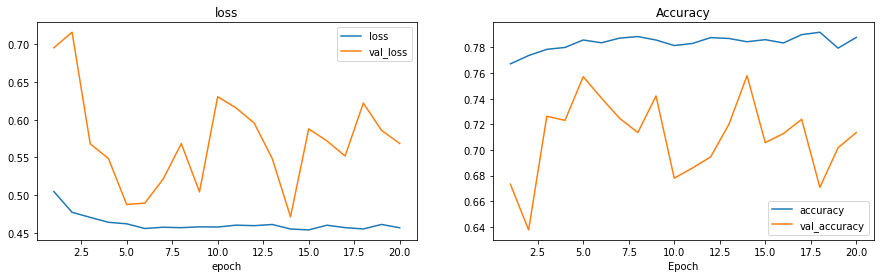

In [58]:
epochs = 20

fig, ax = plt.subplots(ncols=2, figsize=(15,4))
ax[0].plot(range(1,epochs+1), history1.history['loss'],label='loss')
ax[0].plot(range(1,epochs+1), history1.history['val_loss'],label='val_loss')
ax[0].set_title('loss')
ax[0].legend()
ax[0].set_xlabel('epoch')

ax[1].plot(range(1,epochs+1), history1.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epochs+1), history1.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
plt.show()

In [59]:
pred_test = model.predict(X_test_final)
pred_test = np.round_(pred_test)

print("Test")
print(classification_report(y_test,pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,pred_test))

22/22 [==============================] - 0s 3ms/step
Test
              precision    recall  f1-score   support

           0       0.91      0.65      0.76       516
           1       0.46      0.82      0.59       187

    accuracy                           0.70       703
   macro avg       0.69      0.74      0.67       703
weighted avg       0.79      0.70      0.71       703

ROC AUC Score: 0.7363771089831281


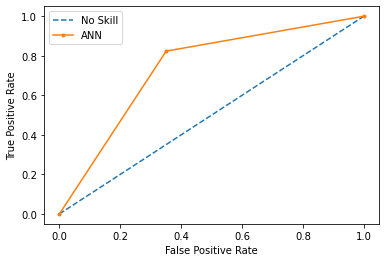

AUC score: 0.7363771089831281


In [60]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
auc = roc_auc_score(y_test,pred_test)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {auc}')

Berdasarkan terdapat exploding gradient dan perbedaan yang cukup jauh antara akurasi data training dan data validasi. selain itu, model mengalami overthing. oleh karena itu, perlu dilakukan handling exploding gradien dengan menambahkan weight atau clip value pada optimezernya sehingga mendapatkan hasil yang maksimal. selain itu juga, perbedaan nilai recall antara 0 dan 1 yang cukup besar menjadi pertimbangan untuk model tersebut melakukan improvement atau perbaikkan dengan mengantikan parameter pada model sehingga meningkat keakurasian modeel dalam menebak 0 (tidak churn) dan 1 (churn)

## Functional

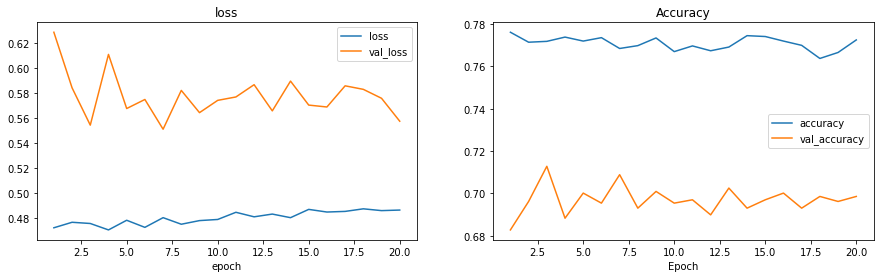

In [61]:
epochs = 20

fig, ax = plt.subplots(ncols=2, figsize=(15,4))
ax[0].plot(range(1,epochs+1), history_func.history['loss'],label='loss')
ax[0].plot(range(1,epochs+1), history_func.history['val_loss'],label='val_loss')
ax[0].set_title('loss')
ax[0].legend()
ax[0].set_xlabel('epoch')

ax[1].plot(range(1,epochs+1), history_func.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epochs+1), history_func.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
plt.show()

In [62]:
pred_test = model_func.predict(X_test_final)
pred_test = np.round_(pred_test)

print("Test")
print(classification_report(y_test,pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,pred_test))

22/22 [==============================] - 0s 4ms/step
Test
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       516
           1       0.47      0.84      0.61       187

    accuracy                           0.71       703
   macro avg       0.70      0.75      0.69       703
weighted avg       0.80      0.71      0.73       703

ROC AUC Score: 0.7519172573892137


Berdasarkan grafik tersebut terdapat exploding gradien pada data validation baik di grafik loss maupun akurasinya. selain itu, model tersebut mengalami underfit pada nilai loss dan overfitting pada nilai akurasi. bukan hanya terdapat perbedaan yang cukup signifikan pada nilai recall 0 dan 1 pada data test. hal tersebut menyebabkan nilai akurasi pada model ini sangat kecil. grafik tersebut menjelaskan bahwa nilai akurasi pada model sequential dan functional hampir sama. oleh karena itu kedua model tersebut perlu dilakukan improvement atau perbaikkan

# **10 - Model Improvement**

## Sequential

In [63]:
alp = 5
inp = X_train_finalfix.shape[1]
out = 1
hid = int(len(X_train_finalfix)/(alp*(inp + out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(X_train_finalfix.shape[1],), kernel_initializer='HeNormal',kernel_regularizer='l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(hid, activation='relu', kernel_initializer='HeNormal',kernel_regularizer='l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

model1.summary()

Jumlah neuron pada hidden layer: 55
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 26)                702       
                                                                 
 batch_normalization (BatchN  (None, 26)               104       
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 55)                1485      
                                                                 
 batch_normalization_1 (Batc  (None, 55)               220       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 1)                 56        
                                                                 
Total params: 2,56

In [64]:
model1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adamax(clipvalue=0.1), metrics='accuracy')

In [65]:
history = model1.fit(train_dat, epochs=20, validation_data=(val_dat))

Epoch 1/20
117/117 [==============================] - 4s 10ms/step - loss: 2.0611 - accuracy: 0.7103 - val_loss: 1.8812 - val_accuracy: 0.7097
Epoch 2/20
117/117 [==============================] - 1s 6ms/step - loss: 1.7821 - accuracy: 0.7349 - val_loss: 1.6871 - val_accuracy: 0.7049
Epoch 3/20
117/117 [==============================] - 1s 6ms/step - loss: 1.6004 - accuracy: 0.7424 - val_loss: 1.5293 - val_accuracy: 0.7104
Epoch 4/20
117/117 [==============================] - 1s 6ms/step - loss: 1.4524 - accuracy: 0.7450 - val_loss: 1.4029 - val_accuracy: 0.7176
Epoch 5/20
117/117 [==============================] - 1s 6ms/step - loss: 1.3406 - accuracy: 0.7425 - val_loss: 1.3010 - val_accuracy: 0.7176
Epoch 6/20
117/117 [==============================] - 1s 6ms/step - loss: 1.2515 - accuracy: 0.7489 - val_loss: 1.2211 - val_accuracy: 0.7152
Epoch 7/20
117/117 [==============================] - 1s 11ms/step - loss: 1.1758 - accuracy: 0.7521 - val_loss: 1.1519 - val_accuracy: 0.7239
Epoc

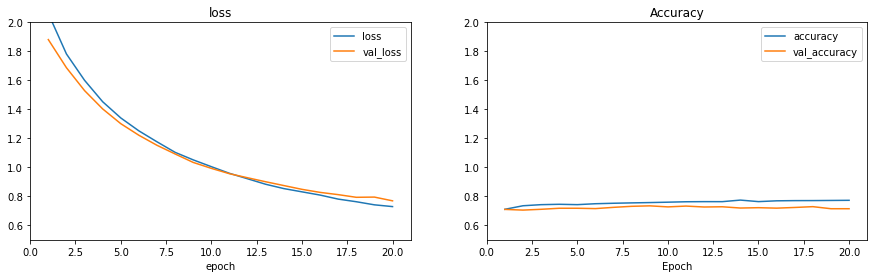

In [66]:
epochs = 20

fig, ax = plt.subplots(ncols=2, figsize=(15,4))
ax[0].plot(range(1,epochs+1), history.history['loss'],label='loss')
ax[0].plot(range(1,epochs+1), history.history['val_loss'],label='val_loss')
ax[0].set_title('loss')
ax[0].legend()
ax[0].axis([0,21,0.5, 2])
ax[0].set_xlabel('epoch')

ax[1].plot(range(1,epochs+1), history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epochs+1), history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].axis([0,21,0.5, 2])
ax[1].set_xlabel('Epoch')
plt.show()

In [67]:
pred_test = model1.predict(X_test_final)
pred_test = np.round_(pred_test)

print("Test")
print(classification_report(y_test,pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,pred_test))

22/22 [==============================] - 0s 3ms/step
Test
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       516
           1       0.48      0.81      0.60       187

    accuracy                           0.71       703
   macro avg       0.69      0.74      0.69       703
weighted avg       0.79      0.71      0.73       703

ROC AUC Score: 0.7438595945777888


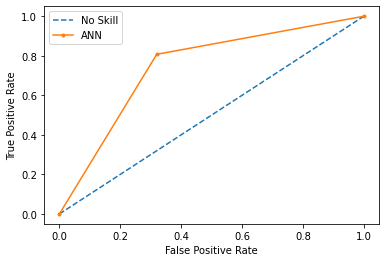

AUC score: 0.7438595945777888


In [68]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
auc = roc_auc_score(y_test,pred_test)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {auc}')

Berdasarkan grafik tersebut terdapat perbedaan yang cukup signifikan antara model sequential sebelum dilakukan improvement dengan model setelah dilakukan. model tersebut lebih fit dari modelnya sebelumnya. nilai akurasi lebih tinggi dari model sebelumnya dilakukan improvement dan perbedaan nilai recall antara 0 dan 1 pada test tidak cukup jauh dibanding dengan model sebelumnyanya. akan tetapi parameter tersebut bukan merupakan parameter yang optimal pada model tersebut. hal ini terlihat nilai loss yang cukup besar pada model sequential tersebut.

## Functional

In [137]:
input = tf.keras.Input(shape=(X_train_finalfix.shape[1],))
layers = tf.keras.layers.BatchNormalization()(input)
layers = tf.keras.layers.Dense(55, activation='relu', kernel_initializer='HeNormal',kernel_regularizer='l2')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

model_func1 = tf.keras.Model(inputs=input, outputs=output)

In [138]:
model_func1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adamax(clipvalue=0.1), metrics='accuracy')

In [139]:
history_func1 = model_func1.fit(train_dat, epochs=20, validation_data=(val_dat))

Epoch 1/20
117/117 [==============================] - 11s 9ms/step - loss: 1.5705 - accuracy: 0.6936 - val_loss: 1.4936 - val_accuracy: 0.6519
Epoch 2/20
117/117 [==============================] - 1s 6ms/step - loss: 1.3167 - accuracy: 0.7408 - val_loss: 1.2621 - val_accuracy: 0.7009
Epoch 3/20
117/117 [==============================] - 1s 6ms/step - loss: 1.1737 - accuracy: 0.7382 - val_loss: 1.1076 - val_accuracy: 0.7176
Epoch 4/20
117/117 [==============================] - 1s 7ms/step - loss: 1.0566 - accuracy: 0.7436 - val_loss: 1.0114 - val_accuracy: 0.7160
Epoch 5/20
117/117 [==============================] - 1s 6ms/step - loss: 0.9790 - accuracy: 0.7451 - val_loss: 0.9319 - val_accuracy: 0.7271
Epoch 6/20
117/117 [==============================] - 2s 16ms/step - loss: 0.9103 - accuracy: 0.7392 - val_loss: 0.8765 - val_accuracy: 0.7278
Epoch 7/20
117/117 [==============================] - 2s 16ms/step - loss: 0.8732 - accuracy: 0.7424 - val_loss: 0.8334 - val_accuracy: 0.7310
Epo

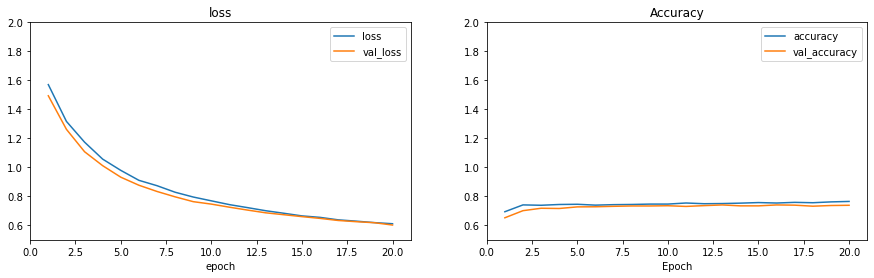

In [140]:
epochs = 20

fig, ax = plt.subplots(ncols=2, figsize=(15,4))
ax[0].plot(range(1,epochs+1), history_func1.history['loss'],label='loss')
ax[0].plot(range(1,epochs+1), history_func1.history['val_loss'],label='val_loss')
ax[0].set_title('loss')
ax[0].legend()
ax[0].axis([0,21,0.5, 2])
ax[0].set_xlabel('epoch')

ax[1].plot(range(1,epochs+1), history_func1.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epochs+1), history_func1.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].axis([0,21,0.5, 2])
ax[1].set_xlabel('Epoch')
plt.show()

In [141]:
pred_test = model_func1.predict(X_test_final)
pred_test = np.round_(pred_test)

print("Test")
print(classification_report(y_test,pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,pred_test))

22/22 [==============================] - 0s 3ms/step
Test
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       516
           1       0.50      0.73      0.59       187

    accuracy                           0.73       703
   macro avg       0.69      0.73      0.70       703
weighted avg       0.78      0.73      0.75       703

ROC AUC Score: 0.7325892301952492


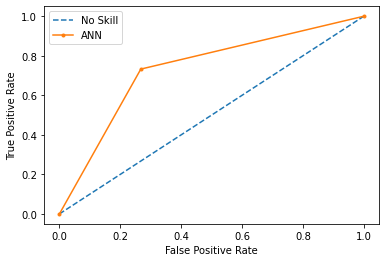

AUC score: 0.7325892301952492


In [142]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
auc = roc_auc_score(y_test,pred_test)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {auc}')

Berdasarkan grafik tersebut, improvement yang diaplikasikan pada model functional berdampak pada nilai akurasi pada model tersebut. terdapat peningkatkan nilai akurasi dan pengurangi nilai loss pada model setelah dilakuakan model improvement. dan terdapat peningkatkan yang cukup signifikan pada model functional setelah dilakuakan improvement. akan tetapi, model functinol menghasilkan nilai akurasi yang lebih tinggi dari model sequential. oleh sebab itu, model functional digunakan untuk memprediksi customer churn atau tidak pada data yang baru.

# **11 - Model Inference**

In [75]:
tranform_inf = preprocess.transform(data_inf)

prediction = model_func1.predict(tranform_inf )
prediction = np.round_(prediction)
pred_fix = pd.DataFrame(prediction, columns=['Churn (Prediction)'])

Pred_inf = pd.concat([data_inf, pred_fix], axis=1)
Pred_inf


1/1 [==============================] - 0s 409ms/step


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn (Prediction)
0,1918-ZBFQJ,Female,0,No,No,13,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,79.25,1111.65,1,1.0
1,9862-KJTYK,Male,0,No,Yes,19,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),25.35,566.10,0,0.0
2,5334-AFQJB,Male,1,No,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.10,1789.90,0,0.0
3,6253-WRFHY,Male,0,Yes,Yes,13,Yes,No,DSL,No,...,No,Yes,Yes,One year,Yes,Electronic check,64.75,877.35,0,1.0
4,5959-BELXA,Male,1,No,No,32,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),96.15,3019.25,1,1.0
5,1015-JPFYW,Male,0,No,Yes,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,136.75,0,0.0
6,2107-FBPTK,Female,1,No,No,30,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.10,3121.10,0,1.0
7,7551-DACSP,Male,0,Yes,Yes,6,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Mailed check,55.30,324.25,1,1.0
8,1113-IUJYX,Female,0,Yes,No,14,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,One year,No,Mailed check,105.95,1348.90,1,0.0
9,5245-VDBUR,Female,0,Yes,No,52,No,No phone service,DSL,Yes,...,No,No,No,One year,No,Mailed check,35.45,1958.95,0,0.0


Berdasarkan hasil uji coba terhadap model inference didapat bahwa terdapat kesalahan memprediksi 3 data dari 10 data yang tersedia. hal ini mengartikan bahwa model tersebut sudah cukup baik dalam memprediksi data baru. akan tetapi masih perlu dilakukan improvement lebih lanjut terhadap model tersebut untuk meningkatkan tingkat keakurasian dan kepresisian model dalam memprediksi customer churn atau tidak

# **12 - Save Model**

In [76]:
pickle.dump(preprocess, open('preprocess_churn1.pkl', 'wb'))
model_func1.save('model_churn1.h5')


# **13 - Conclusion and Overall Analysis**

Pada kasus ini dilakukan pembuatan model untuk memprediksi apakah customer tersebut churn atau tidak churn. model yang digunakan pada kasus ini merupakan model sequential dan functional. prediksi tersebut bertujuan untuk meningkatkan omset dari PT INIHOME dengan cara mentreatment customer - customer churn atau tidak berlangganan dengan produk PT INIHOME. berdasarkan data analisis didapat bahwa:
1. jumlah customer churn di perusahan ini lebih kecil dari jumlah customer no churn. akan tetapi jumlah customer churn cukup banyak.
2. mayoritas customer churn tidak puas dengan pelayanan dan kualitas layanan PT INIHOME
3. mayoritas customer churn telah berlanganan satu sampai dua tahun di PT INIHOME.

dari data tersebut disarankan PT INIHOME untuk memperbaiki pelayanan dan kualitas layanan untuk customer churn. setealah itu, perusahan INIHOME perlu memberikan promo - promo atau diskon untuk meningkatkan income perusahan dengan menarik perhatian kembali dari  customer churn.

untuk mengetahui customer churn atau tidak diperlukan salah satu model dalam memprediksi hal tersebut. model prediksi ini bertujuan untuk meringankan kerja dari divisi marketing dalam mengklasifikasikan customer churn atau tidak churn pada perusahan tersebut. sehingga divisi marketing dapat menentukan cara mentreatment customer churn dan tidak churn pada perusahan  tersebut. 

dalam pembuatan model dilakukan data preprocessing yang terdiri dari feature selection, handling outlier, feature scaling , feature encoding dan handling imbalance. hal tersebut bertujuan untuk meningkat keakurasian dari model tersebut. setelah itu, dataset tersebut dimasukkan kedalam model.

pada kasus ini dilakukan percobaan berbagai parameter dalam membentuk suatu architectur model yang terbaik. dari percobaan tersebut didapat model yang terbaik yaitu model functional dengan akurasi pada data train 0.7608 (76%) dengan nilai loss pada data train 0.6925, dan akurasi pada data validasi sebesar  0.7405 (74.05%) dengan nilai loss 0.6121. selain itu nilai recall pada data test untuk nilai 0 sebesar 73% dan 1 sebesar 75% dengan akurasi sebesar 74%. architectur dari model tersebut diantaranya:
1. jumlah neuron sebanyak 55
2. jumlah hidden layer 1
3. activitation pada hidden layer 'relu'
4. activitation pada layer output 'sigmoid'
5. model mengunakan bacthnormalization 
6. optimizer adamax dengan clip value 0.1
7. model mengunakan kernel_initializer='HeNormal' dan
8. model mengunakan kernel_regularizer='l2'

dalam menentukan nilai akurasi prediksi pada kasus ini digunakan nilai recall. hal tersebut supaya meminimalisir nilai false negatif sehingga tidak customer yang churn diprediksi tidak churn. selain itu, keakurasian model tersebut dapat dilakukan improvement lagi dengan cara:
1. memakai callback ketika melakukan training model dan meningkatkan nilai epoch
2. mengeksplor nilai neuron yang paling optimun, dan
3. menambah jumlah neuron pada architektur model tersebut